In [1]:
import numpy as np
import os
import datetime
import pandas as pd
import random
from scipy import stats
# from tqdm import tqdm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import preprocessing
from sklearn import datasets
from matplotlib.colors import ListedColormap

In [2]:
from sklearn import model_selection
from sklearn import pipeline
from sklearn import linear_model
from sklearn import dummy
from sklearn import svm

### Logistic Regression
- P(y=1|x) = 1 / (1 + e^-(B + Bx))

In [16]:
iris = datasets.load_iris()
features = iris.data[:100, :]
target = iris.target[:100]
my_scaler = preprocessing.StandardScaler()
features_stand = my_scaler.fit_transform(features)

In [17]:
ols = linear_model.LogisticRegression(random_state=0)
model = ols.fit(features_stand, target)

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
new_obs = [[0.5, 0.5, 0.5, 0.5]]
model.predict_proba(new_obs)

array([[0.18944274, 0.81055726]])

Multi Class:
- Train as one vs rest logistic regression so a separate model for each class
- Multinomial logistic regression uses soft Max function:
- P(y=k|X) = (e ^ Bk * x) / (SUM ( e ^ Bj * x)) : that class / sum of all classes

In [19]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
my_scaler = preprocessing.StandardScaler()
features_stand = my_scaler.fit_transform(features)

In [20]:
ols = linear_model.LogisticRegression(random_state=0, multi_class='ovr')
model = ols.fit(features_stand, target)

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
new_obs = [[0.5, 0.5, 0.5, 0.5]]
model.predict_proba(new_obs)

array([[0.08401839, 0.29392375, 0.62205786]])

### Regularization - Reduce Variance

In [22]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
my_scaler = preprocessing.StandardScaler()
features_stand = my_scaler.fit_transform(features)

In [23]:
ols = linear_model.LogisticRegressionCV(penalty='l2', Cs=10, random_state=0, n_jobs=-1)
model = ols.fit(features_stand, target)

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [24]:
new_obs = [[0.5, 0.5, 0.5, 0.5]]
model.predict_proba(new_obs)

array([[0.44480206, 0.55174301, 0.00345494]])

### Train on Large Data
- Use stochastic average gradient (SAG), need to standardize features

In [25]:
ols = linear_model.LogisticRegression(random_state=0, solver='sag')
model = ols.fit(features_stand, target)

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [26]:
new_obs = [[0.5, 0.5, 0.5, 0.5]]
model.predict_proba(new_obs)

array([[0.0387587, 0.4066696, 0.5545717]])

Imbalanced Classes:
- Parameter: class_weight='balanced'
- weight inversely proportional to frequency: w_class = total_obs / (num_classes * num_obs_in_class)

# Support Vector Machines
- Hyperplane that maximizes the distance between classes
- C: penalty impoed on errors, small less penalty (more bias) and high more penalty (high variance)

In [27]:
iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]
my_scaler = preprocessing.StandardScaler()
features_stand = my_scaler.fit_transform(features)

In [28]:
svc = svm.LinearSVC(C=1.0)
model = svc.fit(features_stand, target)

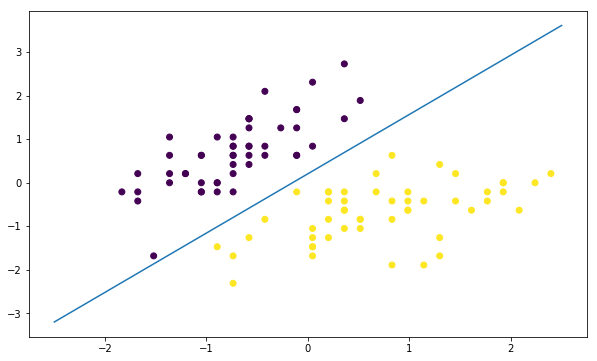

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(features_stand[:, 0], features_stand[:, 1], c=target)
# Hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]
# plot it
plt.plot(xx, yy)
plt.show()

In [30]:
svc.coef_, svc.intercept_

(array([[ 1.68971836, -1.24087068]]), array([0.2598005]))

### Linearly Inseparable - use Kernels

In [33]:
np.random.seed(0)
features = np.random.randn(200, 2)
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

In [35]:
svc = svm.SVC(kernel='rbf', random_state=0, gamma=1, C=1)
model = svc.fit(features, target)

In [3]:
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(('red', 'blue'))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y ==cl, 1], alpha=0.8, c=cmap(idx), marker='+', label=cl)
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


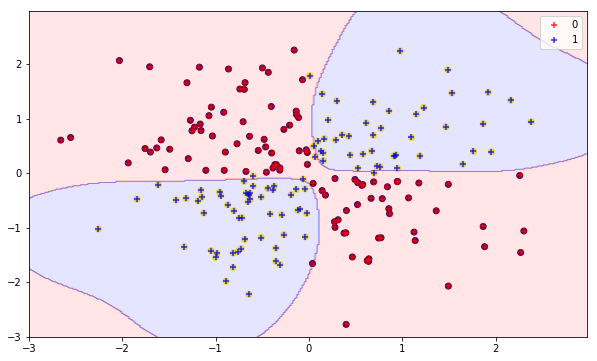

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], c=target)
# Hyperplane
plot_decision_regions(features, target, svc)
plt.legend()
plt.show()

In [45]:
xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))

In [51]:
xx2.ravel()

array([-3.  , -3.  , -3.  , ...,  2.98,  2.98,  2.98])

In [52]:
xx1.ravel()

array([-3.  , -2.98, -2.96, ...,  2.94,  2.96,  2.98])

### Support Vectors
- observations that are used to support the decision hyperplane
- small number of observations actually determine the hyperplane

In [53]:
iris = datasets.load_iris()
features = iris.data[:100, :]
target = iris.target[:100]
my_scaler = preprocessing.StandardScaler()
features_stand = my_scaler.fit_transform(features)

In [55]:
svc = svm.SVC(kernel='linear', random_state=0)
model = svc.fit(features_stand, target)
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [56]:
print("Indices: {0}".format(model.support_))
print("Indices: {0}".format(model.n_support_))

Indices: [23 41 57 98]
Indices: [2 2]


### Imbalanced Classes
- Increase the penalty for misclassifying the samller class wiwth class wieght

In [4]:
iris = datasets.load_iris()
features = iris.data[40:100, :]
target = iris.target[40:100]
my_scaler = preprocessing.StandardScaler()
features_stand = my_scaler.fit_transform(features)

In [6]:
svc = svm.SVC(kernel='linear', random_state=0, C=1.0, class_weight='balanced')
model = svc.fit(features_stand, target)
model.support_vectors_

array([[-2.0296198 , -1.43246061, -2.21674172, -1.99211234],
       [-1.22421511,  1.61893477, -1.95019963, -1.29176034],
       [-1.38529605, -1.17817766, -0.43979445, -0.35795769],
       [-1.06313418, -0.92389471, -0.70633654, -0.12450702]])

- C is hyperparameter for penalizing misclassifying observations
- Ck = C * Wj : C penalty, Wj weight inversely proportional to class j frequency
- balanced automatically weights classes: Wj = n / k *nj